In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 奇异值分解-Singular Value Decomposition (SVD) 

In [2]:
img = cv2.imread('./data/svd_sample.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_image = gray_image.astype(np.float64)

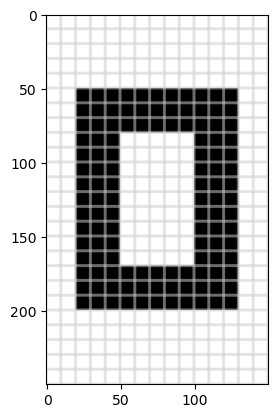

In [3]:
plt.imshow(gray_image,cmap='gray')

In [5]:
U, s, V = np.linalg.svd(gray_image)
U.shape, s.shape, V.shape

((250, 250), (150,), (150, 150))

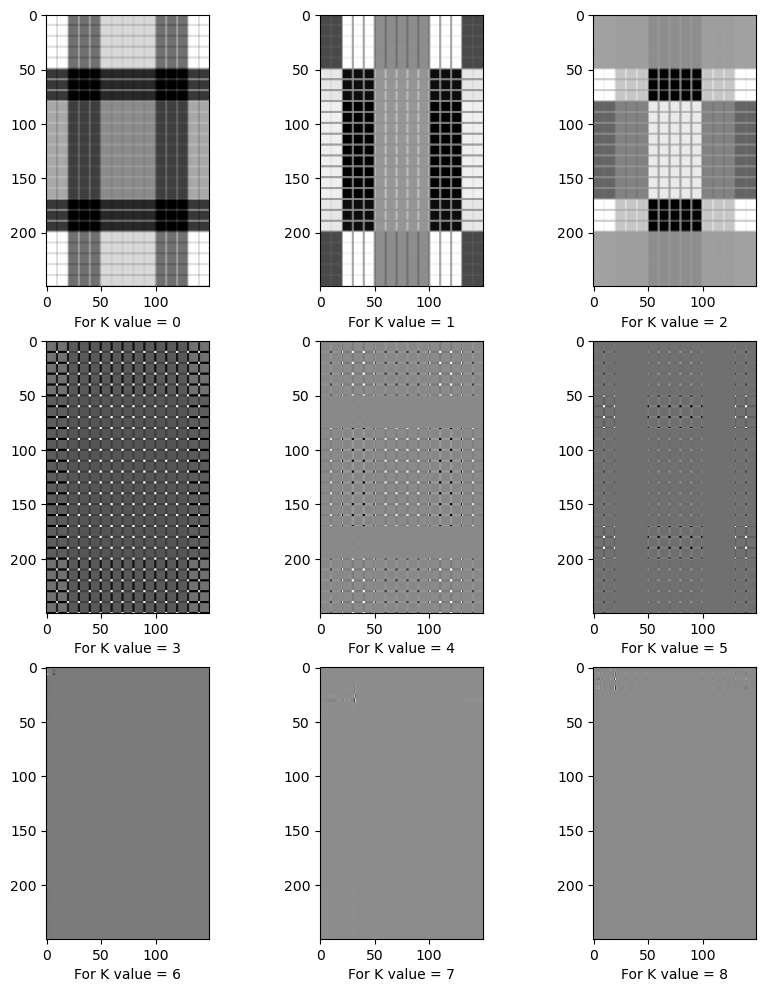

In [6]:
plt.figure(figsize=(10,12))
for k in range(9):
    k_img = s[k]*np.dot(U[:,k].reshape(-1,1),V[k,:].reshape(1,-1))
    plt.subplot(3,3,k+1),  
    plt.imshow(k_img, cmap='gray'), 
    plt.xlabel(f"For K value = {k}") 

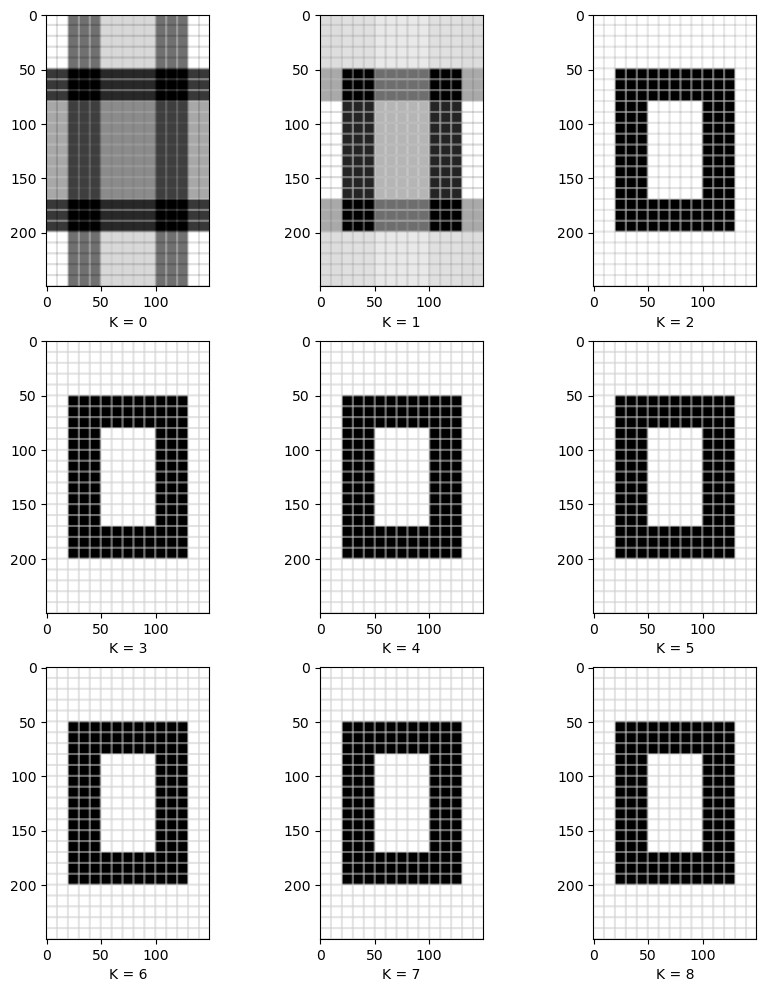

In [7]:
plt.figure(figsize=(10,12))
k_sum = np.zeros_like(gray_image)
for k in range(9):
    k_img = s[k]*np.dot(U[:,k].reshape(-1,1),V[k,:].reshape(1,-1))
    k_sum += k_img
    plt.subplot(3,3,k+1), 
    plt.imshow(k_sum, cmap='gray'), 
    plt.xlabel(f"K = {k}") 

In [8]:
s[0]

37516.348181603695

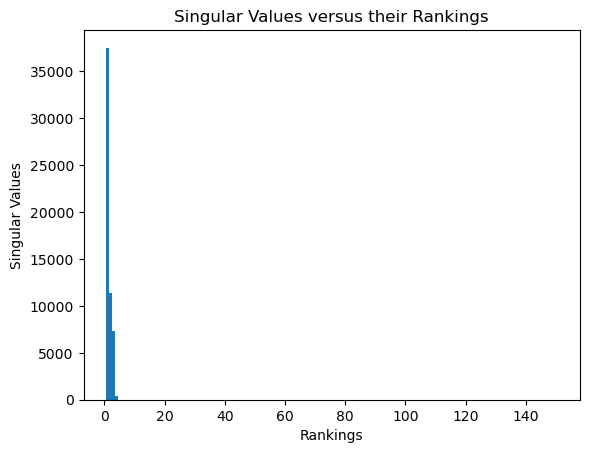

In [9]:
plt.bar(range(1, len(s) + 1), s) 
plt.xlabel("Rankings") 
plt.ylabel("Singular Values") 
plt.title("Singular Values versus their Rankings") 
plt.show()

# 2. SVD and PCA

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('./data/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
X = df.values[:,:-1]
X.shape, isinstance(X,np.ndarray)

((150, 4), True)

# （1）使用协方差矩阵求PCA

In [16]:
mean_x = X.mean(axis=0).reshape(1,-1)
X_center = X-mean_x
cov_x = np.cov(X,rowvar=False)
eig_values, W = np.linalg.eig(cov_x)
X_reduce = np.dot(X,W)

In [17]:
X.shape,W.shape

((150, 4), (4, 4))

In [18]:
W

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [19]:
print('Number of P.C.s:', len(eig_values))
print('First P.C. explains', np.sum(eig_values[0]) / np.sum(eig_values), 'of the total variance.')
print('Second P.C. explains', np.sum(eig_values[1]) / np.sum(eig_values), 'of the total variance.')
print('Third P.C. explains', np.sum(eig_values[2]) / np.sum(eig_values), 'of the total variance.')
print('Fourth P.C. explains', np.sum(eig_values[3]) / np.sum(eig_values), 'of the total variance.')

Number of P.C.s: 4
First P.C. explains 0.9246162071742682 of the total variance.
Second P.C. explains 0.05301556785053502 of the total variance.
Third P.C. explains 0.017185139525006804 of the total variance.
Fourth P.C. explains 0.005183085450190022 of the total variance.


# （2）使用SVD求PCA

In [20]:
U, S, VT = np.linalg.svd(cov_x)
X_reduce_svd = np.dot(X,VT.T)

Text(0, 0.5, 'Principal Component 2')

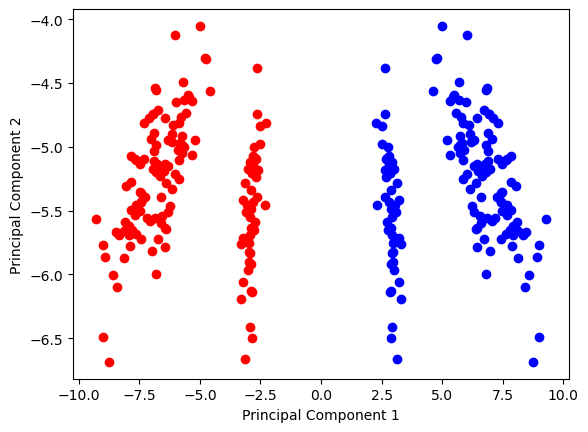

In [21]:
plt.scatter(X_reduce[:,0], X_reduce[:,1],c='blue')
plt.scatter(X_reduce_svd[:,0], X_reduce_svd[:,1],c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')